In [1]:
import matplotlib.pyplot as plt
import os

import pyopia.classify
import pyopia.process
import pyopia.statistics
import pyopia.pipeline
import pyopia.instrument.silcam
import pyopia.io
import pyopia.tests.testdata
import pyopia.plotting

In [2]:
filename = pyopia.tests.testdata.get_example_silc_image(os.getcwd())

In [3]:
toml_settings = pyopia.io.load_toml('config.toml')
data = dict()

In [4]:
model_path = pyopia.tests.testdata.get_example_model(os.getcwd())
cl = pyopia.classify.Classify(model_path=toml_settings['steps']['classifier']['model_path'])
data['cl'] = cl

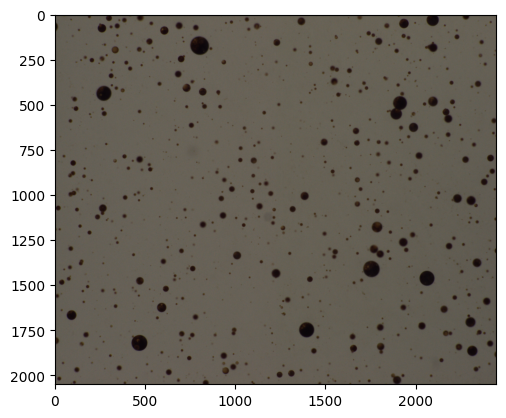

In [5]:
data['filename'] = filename
SilCamLoad = pyopia.instrument.silcam.SilCamLoad()
data = SilCamLoad(data)
plt.imshow(data['imraw'][:,:,:]/255)

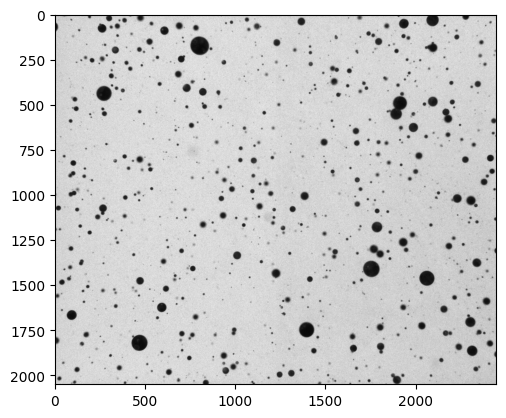

In [6]:
ImagePrep = pyopia.instrument.silcam.ImagePrep(image_level='imraw')
data = ImagePrep(data)
plt.imshow(data['imc'], cmap='grey')

segment
clean


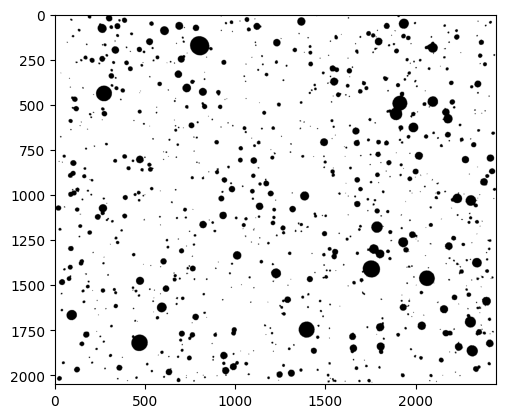

In [7]:
Segment = pyopia.process.Segment(threshold=0.85)
data = Segment(data)
plt.imshow(~data['imbw'], cmap='grey')

In [8]:
# @todo Example dilation of everything

In [9]:
CalculateStats = pyopia.process.CalculateStats()
data = CalculateStats(data)

statextract
21.7% saturation
measure
  870 particles found
WARNING. exportparticles temporarily modified for 2-d images without color!
EXTRACTING 870 IMAGES from 870


In [10]:
# @todo Example plot bounding boxes

In [11]:
xstats = pyopia.io.make_xstats(data['stats'], toml_settings)
xstats

<xarray.Dataset>
Dimensions:                     (index: 870)
Coordinates:
  * index                       (index) int64 0 1 2 3 4 ... 865 866 867 868 869
    time                        (index) datetime64[ns] 2018-11-01T14:27:31.83...
Data variables: (12/17)
    major_axis_length           (index) float64 6.176 15.52 21.23 ... 6.34 5.779
    minor_axis_length           (index) float64 2.744 13.09 ... 4.598 2.874
    equivalent_diameter         (index) float64 3.909 14.14 ... 5.412 4.068
    minr                        (index) float64 3.0 3.0 ... 2.033e+03 2.037e+03
    minc                        (index) float64 77.0 1.896e+03 ... 1.754e+03
    maxr                        (index) float64 8.0 18.0 ... 2.039e+03 2.043e+03
    ...                          ...
    probability_copepod         (index) float64 0.003022 7.33e-06 ... 0.004511
    probability_diatom_chain    (index) float64 0.004415 2.536e-06 ... 0.00513
    probability_oily_gas        (index) float64 0.106 0.0222 ... 0.1116 0.04442
    export name                 (index) object 'D20181101T142731.838206-PN0' ...
    timestamp                   (index) datetime64[ns] 2018-11-01T14:27:31.83...
    saturation                  (index) float64 21.67 21.67 ... 21.67 21.67
Attributes:
    steps:           [general]\nraw_files = "raw_data/*.silc"\npixel_size = 2...
    Modified:        2024-08-05 14:51:27.826997
    PyOpia version:  1.1.3